# LetsGrowMore Virtual Internship Programme 2021

###  Iris Flower Classification ML Project

In [47]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
iris=pd.read_csv("iris.csv")

In [7]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [3]:
iris.shape

(150, 5)

In [4]:
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###  Visualization

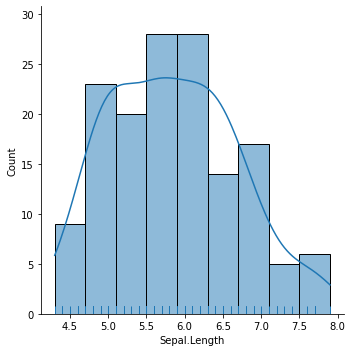

In [10]:
sns.displot(iris['Sepal.Length'], kde=True, rug= True)
plt.show()

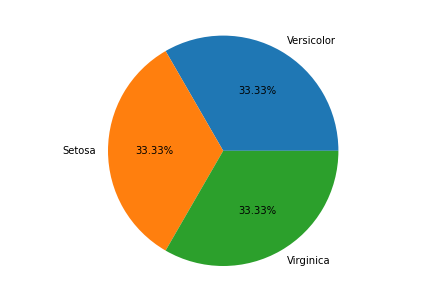

In [79]:
#pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

<AxesSubplot:xlabel='Species', ylabel='Sepal.Width'>

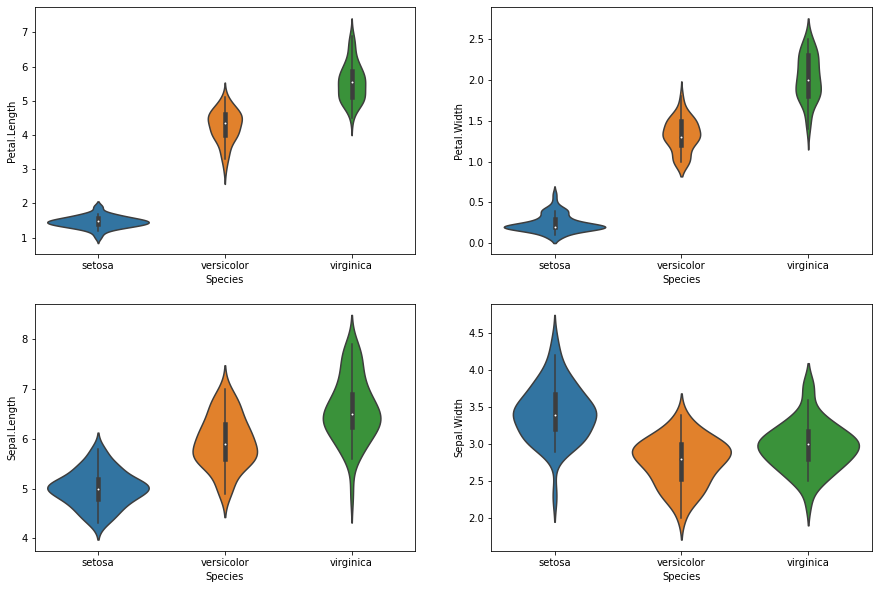

In [80]:
#violin plot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='Petal.Length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='Petal.Width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='Sepal.Length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='Sepal.Width',data=iris)

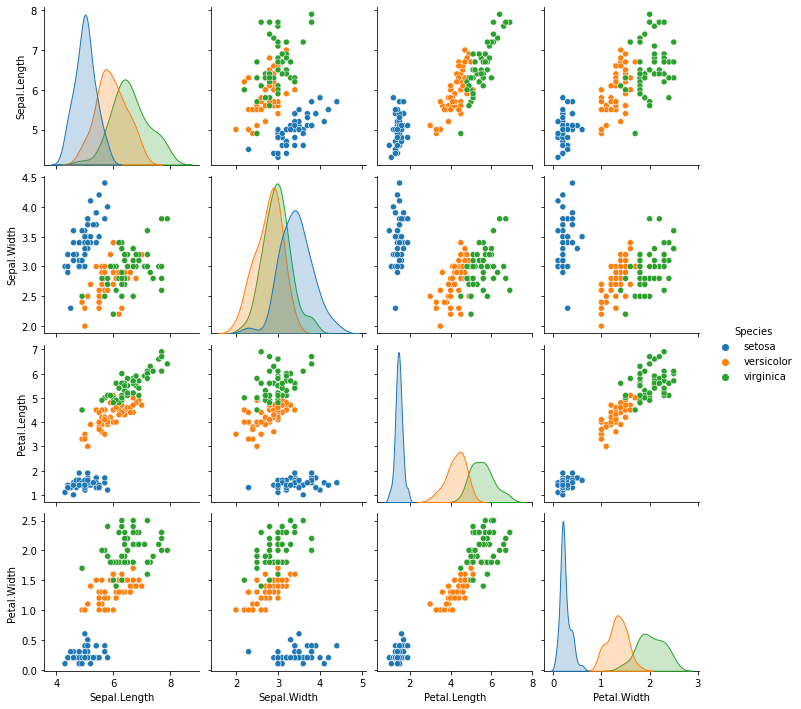

In [81]:
#pair plot
sns.pairplot(iris,hue='Species')

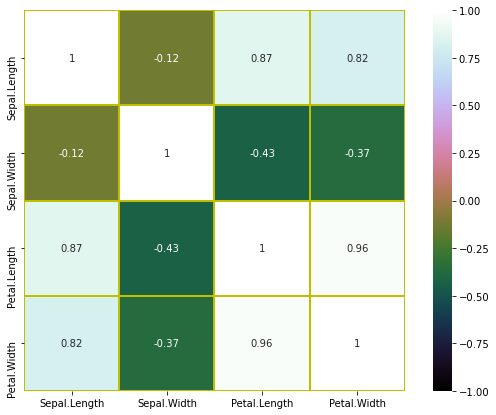

In [82]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(iris.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='y',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

### Data Modeling

In [63]:
X = iris[['Sepal.Length']]
y = iris[['Sepal.Width']]

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [65]:
X_train.head()

,Sepal.Length
81,5.5
32,5.2
44,5.1
27,5.2
61,5.9


In [66]:
X_test.head()

,Sepal.Length
103,6.3
109,7.2
46,5.1
48,5.3
52,6.9


In [67]:
y_train.head()

,Sepal.Width
81,2.4
32,4.1
44,3.8
27,3.5
61,3.0


In [68]:
y_test.head()

,Sepal.Width
103,2.9
109,3.6
46,3.8
48,3.7
52,3.1


In [69]:
X_train = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
y_train = iris.Species

X_test = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
y_test = iris.Species

In [70]:
#Using LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
prediction = LR.predict(X_test)
print('Accuracy:',metrics.accuracy_score(prediction,y_test))

Accuracy: 0.9733333333333334


In [71]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(y_test,prediction))

Confusion matrix: 
 [[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [72]:
(50+47+49)/(50+0+0+0+47+3+0+1+49)

0.9733333333333334

In [73]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,y_train)

y_pred = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(y_test,y_pred))

Acc= 0.9733333333333334


In [74]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.9666666666666667


In [75]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.96


In [76]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 1.0


In [78]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines','KNN', 'Naive Bayes' ,'Decision Tree'],
    'Score': [0.973,0.973,0.966,0.96,1.00]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
1.000,Decision Tree
0.973,Logistic Regression
0.973,Support Vector Machines
0.966,KNN
0.960,Naive Bayes


######  finally, I use Decision Tree algorithm to train the model.